In [193]:
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

In [194]:
import pandas as pd
iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Побудова моделі без відбору ознак

In [196]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [198]:
log_regression = LogisticRegression()

In [199]:
log_regression.fit(X_train,y_train)

LogisticRegression()

In [200]:
y_pred = log_regression.predict(X_test)

In [201]:
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot: >

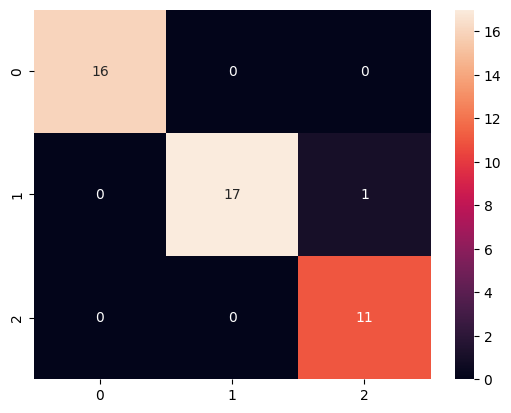

In [202]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [203]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

 Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]
F1: [1.         0.97142857 0.95652174]


## Побудова моделі з відбором ознак

Статистичні методи

Метод VarianceTreshold

In [142]:
from sklearn.feature_selection import VarianceThreshold

In [143]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [144]:
selection = VarianceThreshold(threshold=0.4)

In [145]:
X_new_1 = selection.fit_transform(X)
X_new_1

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [276]:
X_1 = df_iris[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
y_1 = df_iris['target']

In [277]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.3,random_state=0)

In [278]:
log_reg_1 = LogisticRegression()

In [279]:
log_reg_1.fit(X_train_1,y_train_1)

LogisticRegression()

In [280]:
y_pred_1 = log_reg_1.predict(X_test_1)

In [281]:
cnf_matrix = metrics.confusion_matrix(y_test_1, y_pred_1)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [282]:
print(" Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))
print("Precision:",metrics.precision_score(y_test_1, y_pred_1, average = None))
print("Recall:",metrics.recall_score(y_test_1, y_pred_1, average = None))
print("F1:",metrics.f1_score(y_test_1, y_pred_1, average = None))

 Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]
F1: [1.         0.97142857 0.95652174]


Метод SelectKBest

In [185]:
from sklearn.feature_selection import SelectKBest, f_classif

In [274]:
X.shape

(150, 4)

In [89]:
X_new_2 = SelectKBest(f_classif, k=3).fit_transform(X, y)
X_new_2

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

Ознаки, відібрані цим методом, співпадають з попередніми.

Відбір ознак на основі ваг у моделі.

Метод SelectFromModel 

In [228]:
from sklearn.feature_selection import SelectFromModel

In [235]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(), threshold = 0.2)
sfm_selector.fit(X, y)

C:\Users\User\Desktop\Homework Python Data Science\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(), threshold=0.2)

In [236]:
X.columns[sfm_selector.get_support()]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Для даної вибірки цей метод не відкинув жодної ознаки 

Метод головних компонент (PCA)

In [237]:
import numpy as np
from sklearn.decomposition import PCA

In [238]:
pca = PCA(n_components=2)

In [239]:
new_X = pca.fit_transform(X)

In [240]:
new_X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [247]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(new_X,y,test_size=0.3,random_state=0)

In [248]:
log_reg_2 = LogisticRegression()

In [249]:
log_reg_2.fit(X_train_2,y_train_2)

LogisticRegression()

In [250]:
y_pred_2 = log_reg_2.predict(X_test_2)

In [251]:
cnf_matrix = metrics.confusion_matrix(y_test_2, y_pred_2)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [266]:
print(" Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))
print("Precision:",metrics.precision_score(y_test_2, y_pred_2, average = None))
print("Recall:",metrics.recall_score(y_test_2, y_pred_2, average = None))
print("F1:",metrics.f1_score(y_test_2, y_pred_2, average = None))

 Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]
F1: [1.         0.97142857 0.95652174]


Метод TruncatedSVD 

In [253]:
from sklearn.decomposition import TruncatedSVD

In [254]:
svd = TruncatedSVD(n_components=2)
X_new = svd.fit_transform(X)
X_new

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

In [255]:
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X_new,y,test_size=0.3,random_state=0)

In [256]:
log_reg_3 = LogisticRegression()

In [257]:
log_reg_3.fit(X_train_3,y_train_3)

LogisticRegression()

In [258]:
y_pred_3 = log_reg_3.predict(X_test_3)

In [259]:
cnf_matrix = metrics.confusion_matrix(y_test_3, y_pred_3)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [265]:
print(" Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))
print("Precision:",metrics.precision_score(y_test_3, y_pred_3, average = None))
print("Recall:",metrics.recall_score(y_test_3, y_pred_3, average = None))
print("F1:",metrics.f1_score(y_test_3, y_pred_3, average = None))

 Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]
F1: [1.         0.97142857 0.95652174]


Лінійний дискримінантний аналіз (LDA)

In [261]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [262]:
lda = LinearDiscriminantAnalysis()

In [263]:
new_data = lda.fit_transform(X, y)

In [264]:
new_data

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [255]:
X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(new_data,y,test_size=0.3,random_state=0)

In [256]:
log_reg_4 = LogisticRegression()

In [257]:
log_reg_4.fit(X_train_4,y_train_4)

LogisticRegression()

In [258]:
y_pred_4 = log_reg_4.predict(X_test_4)

In [259]:
cnf_matrix = metrics.confusion_matrix(y_test_4, y_pred_4)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [260]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

 Accuracy: 0.9777777777777777
Precision: [1.         1.         0.91666667]
Recall: [1.         0.94444444 1.        ]
F1: [1.         0.97142857 0.95652174]


### Висновок

Для даної вибірки даних відбір ознак суттєво не вплинув на метрики моделей